# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 5 &mdash; 30 баллов
* Задача 6 &mdash; 20 баллов




-----

In [ ]:
# Bot check

# HW_ID: phds_hw7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(font_scale=1.3, palette='Set2')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

# Теоретическая часть

### <b><font color="blue">Легкая часть</font></b>

## Задача 1

В условиях задач 2, 3 и 6 из предыдущего домашнего задания постройте асимптотические доверительные интервалы, которые можно использовать на практике (в формулах не должно быть $\theta$).

2.   $X_1,  ..., X_n \sim N(\theta, \sigma^2)$

$\widehat{\theta} = \overline{X}$ - АНО с $\sigma^2(\theta) = \sigma^2$

$S^2$ - состоятельная оценкка с $D(X) = \sigma^2$

АДИ: $$(\overline{X} \pm \frac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \cdot S)$$
4.   $X_1,  ..., X_n \sim U(0, \theta)$

$\widehat{\theta} = 2\overline{X}$ - АНО с $\sigma^2(\theta) = \sigma^2/3$

$\widehat{\sigma} = \frac{\widehat{\theta}}{\sqrt{3}}$ - состоятельная оценкка

АДИ: $$(2\overline{X} \pm \frac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \cdot \frac{2\overline{X}}{\sqrt{3}})$$
6.   $X_1,  ..., X_n \sim N(a, \sigma^2)$

Так как $\sigma$ - известно, то АДИ: $$(\overline{X} \pm \frac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \cdot \sigma)$$


# Практическая часть

### <b><font color="blue">Легкая часть</font></b>

## Задача 2

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [ ]:
df = pd.read_csv('airquality.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [ ]:
features = ['Ozone', 'Solar.R', 'Wind', 'Temp']
df[features].describe().round(2)

,Ozone,Solar.R,Wind,Temp
count,116.00,146.00,153.00,153.00
mean,42.13,185.93,9.96,77.88
std,32.99,90.06,3.52,9.47
min,1.00,7.00,1.70,56.00
25%,18.00,115.75,7.40,72.00
50%,31.50,205.00,9.70,79.00
75%,63.25,258.75,11.50,85.00
max,168.00,334.00,20.70,97.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:**

По различиям между выборочной медианой и выборочным средним для каждого признака можно предположить наличие выбросов.

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

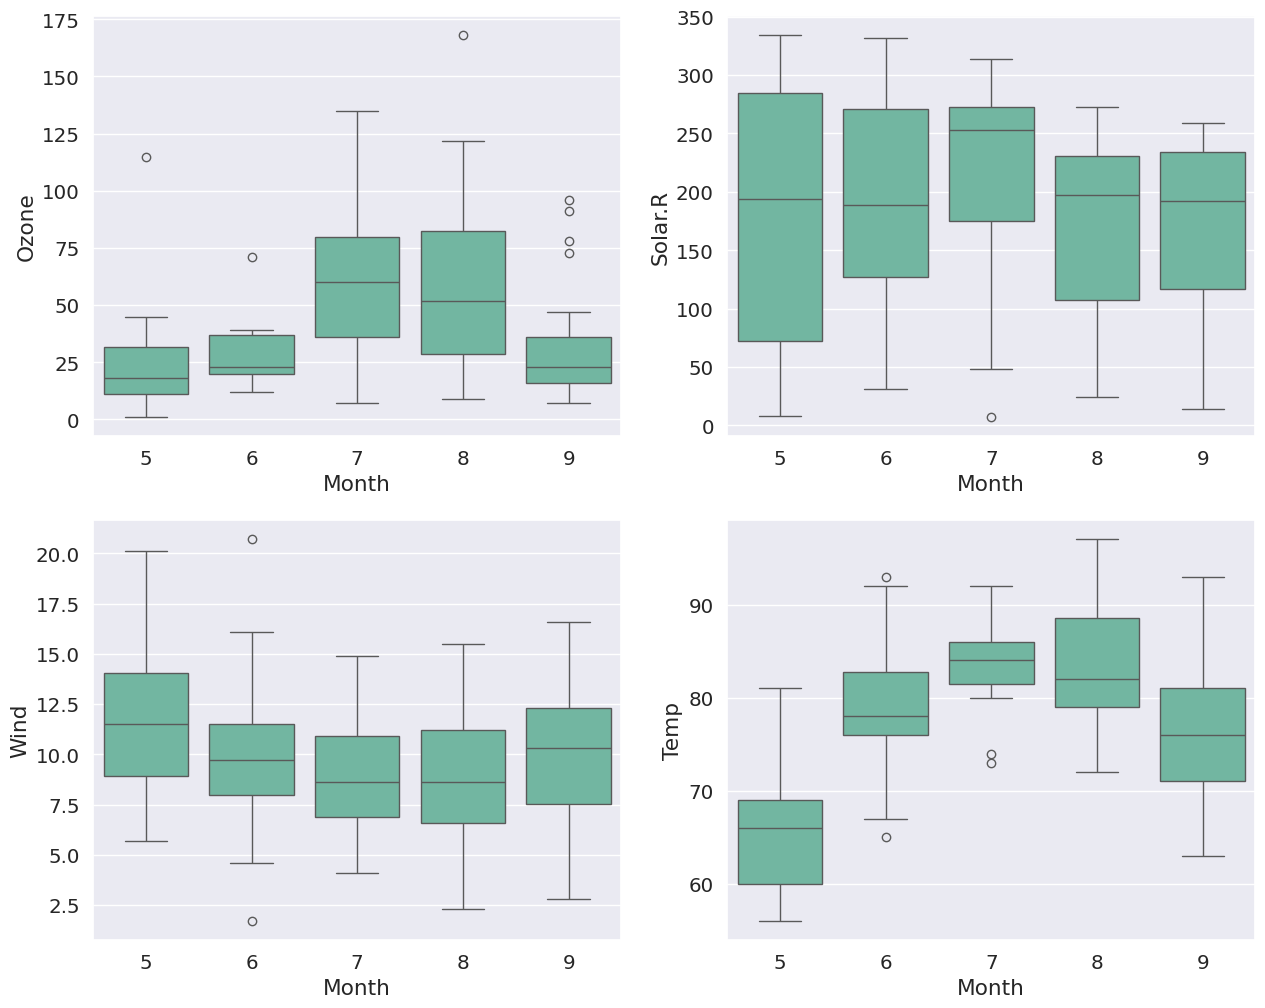

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 12))

for i in range(len(features)):
    f = features[i]
    a = ax[i // 2][i % 2]
    sns.boxplot(data = df, x = 'Month', y = f, ax = a)

plt.show()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:**

Внутри каждого ящика на графике представлена медиана значений параметра. Границы ящика отображают интерквантильный размах, то есть расстояние между первым и третьим квантилями ($\hat{u}{\frac{1}{4}}, \hat{u}{\frac{3}{4}}$).

Границы усов определяются как $\hat{u}{\frac{1}{4}} - 1.5(\hat{u}{\frac{3}{4}} - \hat{u}{\frac{1}{4}})$ и $\hat{u}{\frac{3}{4}} + 1.5(\hat{u}{\frac{3}{4}} - \hat{u}{\frac{1}{4}})$,

где $\hat{u}_p$ - выборочный p-квантиль. Круги за усами обозначают выбросы.

Из графиков видно, что количество выбросов сильно варьируется в зависимости от параметра и месяца. Например, показания озона имеют наибольшее количество выбросов, особенно в 9 месяце. В то же время, солнечная радиация имеет широкий разброс значений без значительного количества выбросов. Значения скорости ветра довольно плотно сгруппированы, и медиана практически не меняется от месяца к месяцу, что отражает схожесть средних значений.

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните:
- выборочное среднее;
- выборочную медиану;

In [ ]:
print('Среднее: ' + str(round(df['Ozone'].mean(), 1)))
print('Медиана: ' + str(df['Ozone'].median()))

Среднее: 42.1
Медиана: 31.5


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** Это вызвано тем, что выбросы, находятся в области с высокими значениями, что увеличивает среднее значение, но не влияет существенно на медиану. Поэтому наблюдаемые различия между средним и медианой обусловлены влиянием выбросов, и показывают, что озон как параметр имеет асимметричное распределение с тяжелым хвостом вправо.

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** В данном случае, наблюдения могут быть связаны с временными зависимостями, т.е. измерения параметров воздуха в различные месяцы могут быть взаимосвязаны из-за сезонных изменений, погодных условий и других факторов. Это может привести к нарушению предположения о независимости наблюдений.

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:**

Зависимость между наблюдениями часто бывает. Её можно проверить визуальным анализом или корреляционным анализом.

Когда предположение о независимости нарушается, это может привести к неправильным выводам в статистических тестах.

Количественные меры зависимости включают коэффициенты корреляции, автокорреляции и ковариации.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:**

Робастные статистики полезны для анализа данных в реальном мире, где присутствуют выбросы и нарушения предположений о распределениях. Визуальный анализ помогает обнаруживать закономерности и аномалии в данных. Однако в реальном мире найти полностью независимые и одинаково распределенные случайные величины часто бывает сложно из-за наличия скрытых зависимостей или факторов.

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

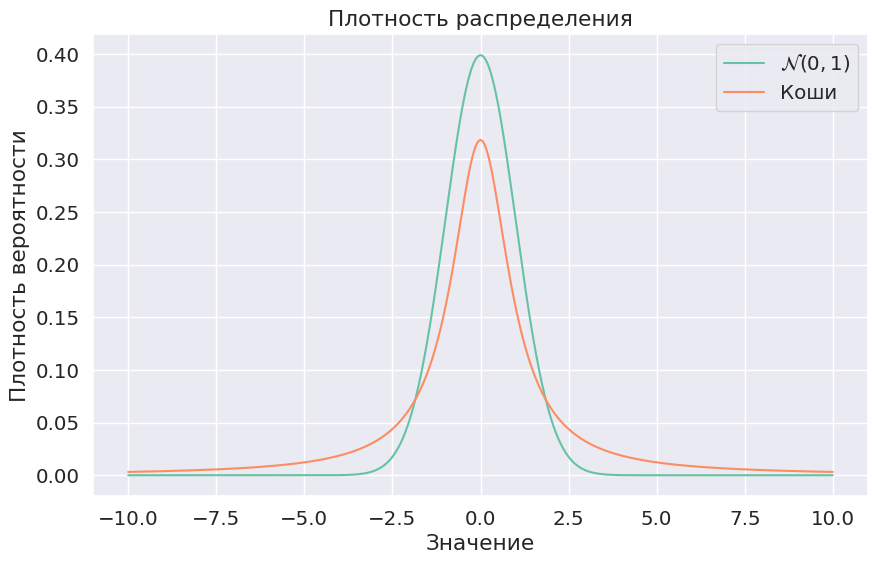

In [ ]:
x = np.linspace(-10, 10, 1000)

pdf_normal = sps.norm.pdf(x)
pdf_cauchy = sps.cauchy.pdf(x)

plt.figure(figsize = (10, 6))
plt.plot(x, pdf_normal, label = r'$\mathcal{N}(0, 1)$')
plt.plot(x, pdf_cauchy, label = 'Коши')

plt.title(r'Плотность распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

plt.legend()
plt.grid(True)
plt.show()

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [ ]:
sample_count = 10**5
sample_size = 30

X_norm = sps.norm().rvs(size = (sample_count, sample_size))

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

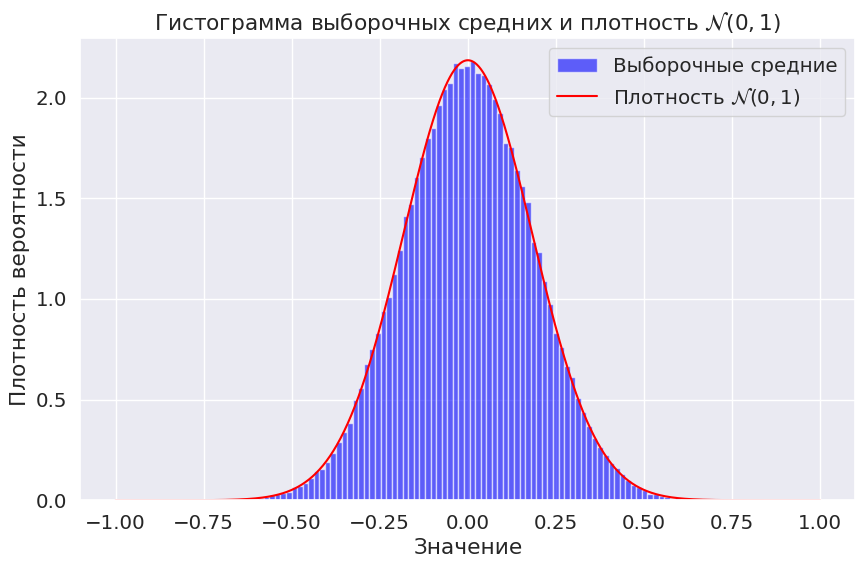

In [ ]:
sample_means = np.mean(X_norm, axis = 1)

plt.figure(figsize = (10, 6))
plt.hist(sample_means, bins = 100, density = True, alpha = 0.6, color = 'b', label = 'Выборочные средние')

x = np.linspace(-1, 1, 1000)
pdf_norm = sps.norm.pdf(x, loc = 0, scale = np.sqrt(1/sample_size))
plt.plot(x, pdf_norm, 'r', label = r'Плотность $\mathcal{N}(0, 1)$')

plt.title(r'Гистограмма выборочных средних и плотность $\mathcal{N}(0, 1)$')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

plt.legend()
plt.grid(True)
plt.show()

**Вывод:**

Стандартное нормальное распределение обладает свойством устойчивости, что означает, что выборочное среднее из выборок, взятых из этого распределения, само имеет стандартное нормальное распределение. Это свойство подтверждается графиком, на котором видно, что гистограмма выборочных средних имеет форму, очень близкую к плотности стандартного нормального распределения.

Также, при работе с выборками размером 30 элементов, важно учитывать изменение дисперсии. В данном случае, дисперсия выборочных средних уменьшается в 30 раз по сравнению с дисперсией исходного распределения, что обеспечивает более компактный разброс значений выборочных средних вокруг среднего значения.

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [ ]:
sample_count = 10**5
sample_size = 30

X_cauchy = sps.cauchy().rvs(size = (sample_count, sample_size))

Построим аналогичный график.

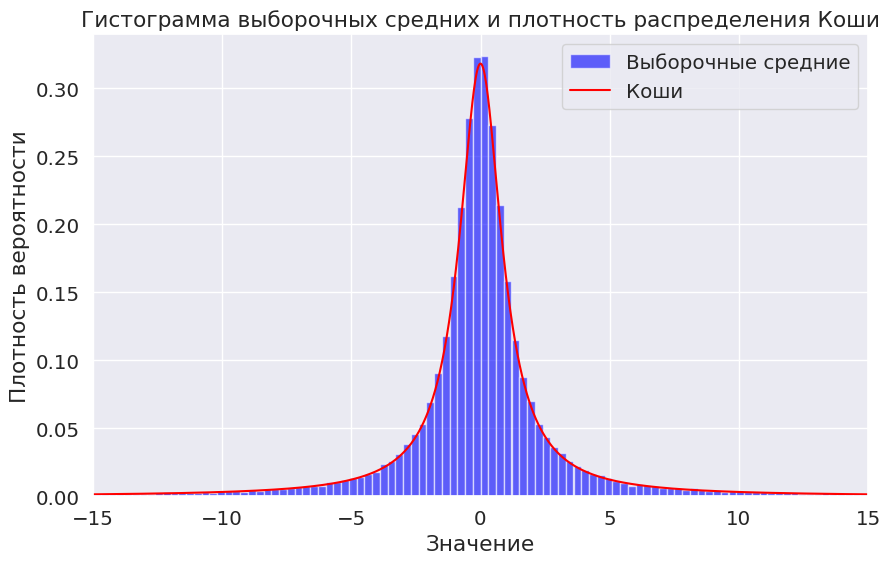

In [ ]:
sample_means = np.mean(X_cauchy, axis = 1)

plt.figure(figsize = (10, 6))
plt.hist(sample_means, bins = 100, density = True, range=(-15, 15), alpha = 0.6, color = 'b', label = 'Выборочные средние')

x = np.linspace(-15, 15, 1000)
pdf_norm = sps.cauchy.pdf(x)
plt.plot(x, pdf_norm, 'r', label = 'Коши')

plt.title('Гистограмма выборочных средних и плотность распределения Коши')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

plt.legend()
plt.grid(True)

plt.xlim(-15, 15)
plt.show()

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:**

Оба распределения, нормальное и распределение Коши, сохраняют свои характеристики при формировании выборочных средних из выборок, что подтверждается наблюдаемыми на графиках стандартных распределений. Однако, в случае распределения Коши, важно учитывать настройку параметров при отображении гистограммы ($range$), чтобы исключить искажения, вызванные отдельными выбросами на числовой оси.


## Задание 4


**Профиль Физика**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data">данные</a> столкновениях частиц и оставьте следующие признаки:
* `E1`, `E2` &mdash; полная энергия электронов (ГэВ);
* `M` &mdash; инвариантная масса двух электронов (ГэВ).

Датасет большой, поэтому для ускорения расчетов можно взять подвыборку размера ~ 1000

**Профиль Биология**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/ruslankl/mice-protein-expression">данные</a> экспрессии белков у белых мышей и оставьте следующие белки для анализа:
* `ITSN1_N`
* `DYRK1A_N`
* `ELK_N`




**1.** Постройте для каждого из них гистограммы. Что можно сказать о характере распределения?


<Figure size 1500x600 with 0 Axes>

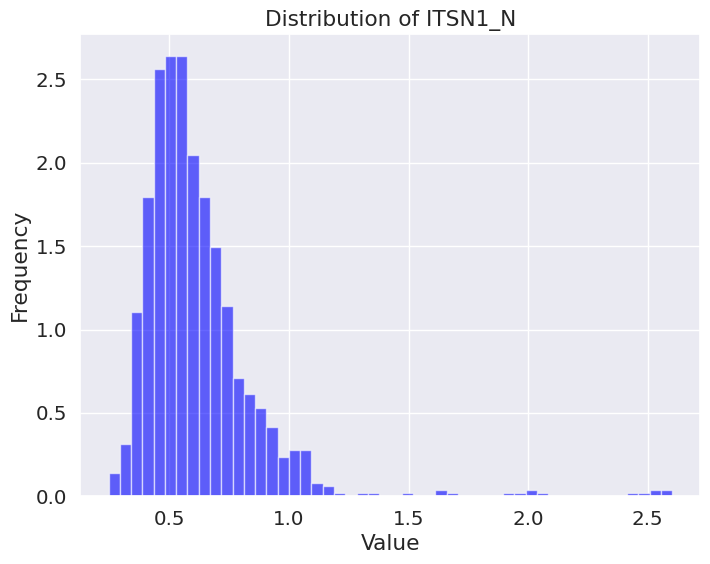

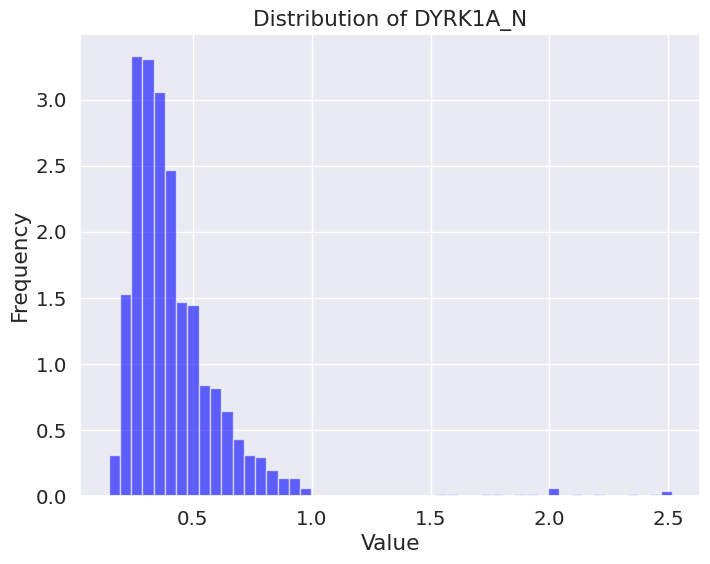

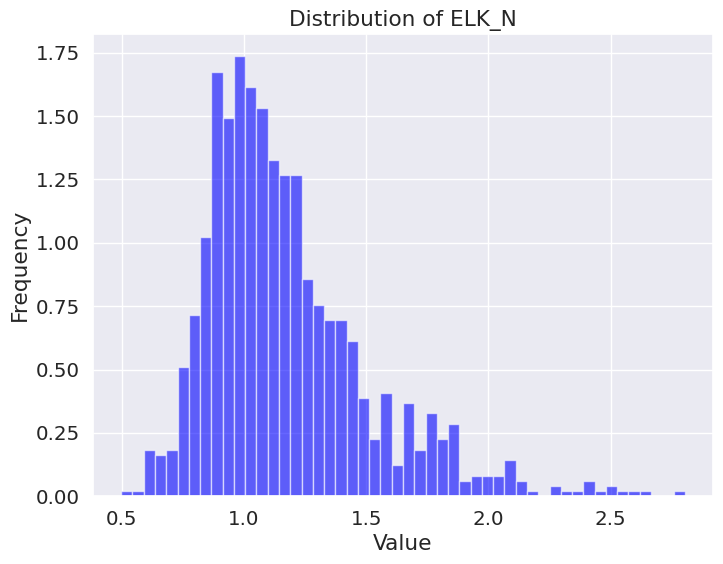

In [ ]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")

columns = ['ITSN1_N', 'DYRK1A_N', 'ELK_N']
target_df = df[columns]

plt.figure(figsize = (15, 6))

for column in columns:
    plt.figure(figsize = (8, 6))
    target_df[column].hist(bins = 50, density = True, alpha = 0.6, color = 'b')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

**Ответ:**

Во всех случаях форма распределений напоминает нормальное распределение, но наблюдается небольшое смещение максимумов влево от центра. Возможно, имеются выбросы, которые могут влиять на общий вид данных.

**2.** Пусть есть выборка $X_1, ..., X_n$. Опишите процедуру бутстрепа построения доверительного интервала для величины $\theta = \mathsf{E} X_1$. Рассмотрите три типа  бутстрепных доверительных интервалов.
Выпишите соответствующие формулы.

**Описание**:

1. Генерируем B новых выборок путем случайного выбора с возвращением n элементов из исходной выборки.

2. Для каждой из полученных выборок вычисляем статистику T (например, выборочное среднее), получая выборку статистик размера B.

3. Используем эту выборку статистик для оценки бутстрепной дисперсии: $\hat{v}_{boot} = \frac{1}{B} \sum \limits_{b=1}^{B}T_b^{*^2} - (\frac{1}{B} \sum \limits_{b=1}^{B}T_b^*)^2$.

Бутстрепные ДИ:
- Нормальный: $$(\hat{\theta} - z_{(1 + \alpha)/2}\sqrt{\hat{v}_{boot}}, \quad \hat{\theta} + z_{(1 + \alpha)/2}\sqrt{\hat{v}_{boot}})$$
- Центральный: $$(2\hat{\theta} - \theta^*_{(\lceil B(1 + \alpha)/2 \rceil},  \quad  2\hat{\theta} - \theta^*_{(\lfloor B(1 - \alpha)/2 \rfloor})$$
- Квантильный: $$(\theta^*_{(\lfloor B(1 - \alpha)/2 \rfloor}, \quad  \theta^*_{(\lceil B(1 + \alpha)/2 \rceil})$$


**3.** Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку и количество бутстрепных выборок $B$.

Для ускорения расчетов можете использовать broadcasting (не является обязательным требованием). Учите, что в таком случае внутри функции у вас могут получиться очень большие матрицы, из-за которых может кончиться оперативная память.

In [ ]:
def bootstrap(sample, B=100_000):
    '''
    Считает бутстрепные оценки для исходной выборки

    :param sample: исходная выборка
    :param B: количество бутстрепных
    :return bootstrap_estimations: оценки по бутстрепным выборкам
    '''
    n = len(sample)
    bootstrap_estimations = np.zeros(B)

    for i in range(B):
        bootstrap_sample = np.random.choice(sample, size = n, replace = True)
        bootstrap_estimations[i] = np.mean(bootstrap_sample)

    return bootstrap_estimations

**4.** Реализуйте три типа бутстрепных доверительных интервалы в виде функций, принимающих на вход выборку оценок, полученных с помощью бутстрепа. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки.

In [ ]:
def bootstrap_normal_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу нормального бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''
    v_boot = np.mean(np.square(bootstrap_estimations)) - np.square(np.mean(bootstrap_estimations))
    z = sps.norm().ppf((1 + alpha) / 2)

    left = theta - z * np.sqrt(v_boot)
    right = theta + z * np.sqrt(v_boot)

    return round(left, 4), round(right, 4)


def bootstrap_central_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу центрального бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''
    up_ind = np.ceil(len(bootstrap_estimations) * (1 + alpha) / 2).astype('int64')
    down_ind = int(len(bootstrap_estimations) * (1 - alpha) / 2)

    up = np.sort(bootstrap_estimations)[up_ind - 1]
    down = np.sort(bootstrap_estimations)[down_ind - 1]

    left = 2 * theta - up
    right = 2 * theta - down

    return round(left, 4), round(right, 4)


def bootstrap_quantile_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу квантильного бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''
    up_ind = np.ceil(len(bootstrap_estimations) * (1 + alpha) / 2).astype('int64')
    down_ind = int(len(bootstrap_estimations) * (1 - alpha) / 2)

    up = np.sort(bootstrap_estimations)[up_ind - 1]
    down = np.sort(bootstrap_estimations)[down_ind - 1]

    left = down
    right = up

    return round(left, 4), round(right, 4)

**5.** Для каждого признака постройте бутстрепные доверительные интервалы для $\theta = \mathsf{E} X_1$ и сравните их.

In [ ]:
dat = pd.DataFrame(index = ['normal', 'central', 'quantile', 'theta', 'interval_length'], columns=df.columns)

for column in columns:
    print()
    print(f'Доверительные интервалы для {column}: \n')
    sample = df[column].dropna().values
    bootstrap_estimations = bootstrap(sample)

    theta = np.mean(sample)

    interval_length = lambda interval: interval[1] - interval[0]

    normal_interval = bootstrap_normal_confidence_interval(theta, bootstrap_estimations)
    central_interval = bootstrap_central_confidence_interval(theta, bootstrap_estimations)
    quantile_interval = bootstrap_quantile_confidence_interval(theta, bootstrap_estimations)

    print(f'Нормальный : {normal_interval}')
    print(f'Центральный: {central_interval}')
    print(f'Квантильный: {quantile_interval}')

    dat[column]['normal'] = normal_interval
    dat[column]['central'] = central_interval
    dat[column]['quantile'] = quantile_interval
    dat[column]['theta'] = theta
    dat[column]['interval_length'] = interval_length(normal_interval)


Доверительные интервалы для ITSN1_N: 

Нормальный : (0.602, 0.6322)
Центральный: (0.6016, 0.6318)
Квантильный: (0.6024, 0.6326)

Доверительные интервалы для DYRK1A_N: 

Нормальный : (0.4109, 0.4407)
Центральный: (0.4105, 0.4401)
Квантильный: (0.4115, 0.4412)

Доверительные интервалы для ELK_N: 

Нормальный : (1.1532, 1.1936)
Центральный: (1.1531, 1.1933)
Квантильный: (1.1535, 1.1937)


**Вывод:**

В этом конкретном случае, объем каждой выборки достаточно велик (более 1000 элементов), что приводит к примерно одинаковым результатам для всех трех методов оценки доверительных интервалов. Их различия становятся заметными только на третьем знаке после запятой.

Визуализируйте бутстрепные интервалы для каждого признака. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию

In [ ]:
def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None,
    ylim=(None, None),
    estim_label = '',
    sample_label='',
    color=None,
    interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''

    n = len(left)
    x = np.arange(1, n + 1)

    plt.figure(figsize = (10, 6))
    plt.fill_between(x, left, right, color = color, alpha = 0.3, label = interval_label)

    if estimation is not None:
        plt.plot(x, estimation, color = 'red', label=estim_label)

    plt.xlabel('Sample Size')
    plt.ylabel('Estimate')
    plt.title('Bootstrap Confidence Intervals')

    plt.legend()
    plt.ylim(ylim)
    plt.grid(True)
    plt.show()

**Решение:**

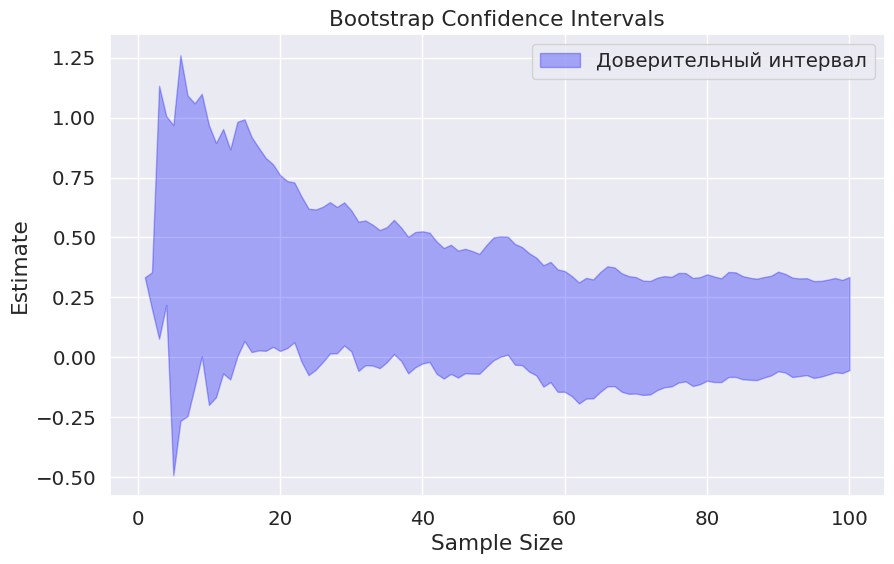

In [ ]:
N = 100
sample = sps.norm.rvs(loc = 0, scale = 1, size = N)

sample_sizes = np.arange(1, N + 1)

bootstrap_estimations = [bootstrap(sample[:i]) for i in sample_sizes]
normal_intervals = [bootstrap_normal_confidence_interval(np.mean(sample[:j]), bootstrap_estimations[i]) for i, j in enumerate(sample_sizes)]

left_intervals = [interval[0] for interval in normal_intervals]
right_intervals = [interval[1] for interval in normal_intervals]

draw_confidence_interval(left_intervals, right_intervals, sample = sample,
                         estim_label = 'Estimate',
                         sample_label = 'Sample',
                         color = 'b',
                         interval_label = 'Доверительный интервал')

**Вывод:**

1.   По мере увеличения размера выборки от 1 до 100, ширина доверительного интервала снижается. Это происходит потому, что с увеличением размера выборки уменьшается дисперсия оценки параметра.

2.   При увеличении размера выборки интервалы становятся более стабильными и уменьшаются в размере. Это свидетельствует о том, что бутстрепные оценки дают более точные результаты при больших объемах выборки.

### <b><font color="orange">Сложная часть</font></b>

## Задача 5


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения,
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду. Сделайте выводы о сходствах и различиях распределений

**Решение:**

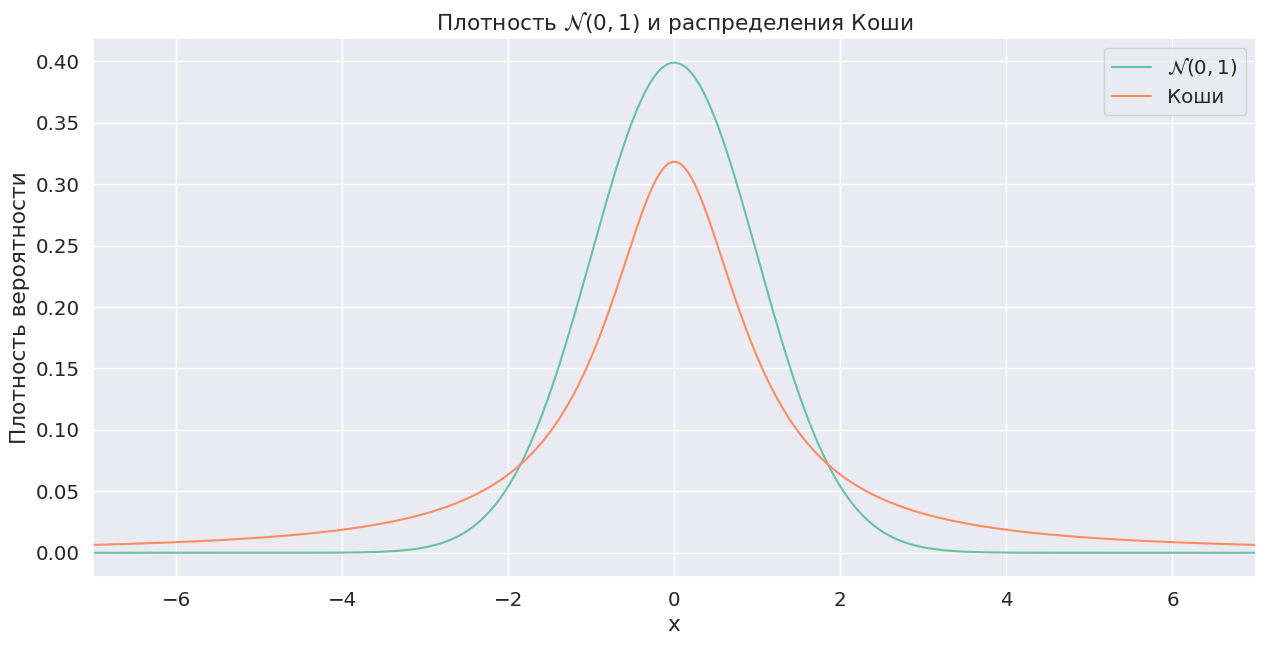

In [ ]:
x = np.linspace(-7, 7, 300)

X_normal = sps.norm().pdf(x)
X_cauchy = sps.cauchy().pdf(x)

plt.figure(figsize = (15, 7))

plt.plot(x, X_normal, label = r'$\mathcal{N}(0, 1)$')
plt.plot(x, X_cauchy, label = 'Коши')

plt.title(r'Плотность $\mathcal{N}(0, 1)$ и распределения Коши')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')

plt.legend()
plt.xlim(-7, 7)
plt.grid(True)
plt.show()

**Вывод:**

Стандартное нормальное распределение быстро убывает к нулю по мере удаления от среднего значения, в то время как у стандартного распределения Коши наблюдаются длинные и тяжелые хвосты, что означает медленное убывание вероятности при удалении от среднего значения.

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

**Th:** $\sqrt{n} (\overline{X_{\alpha}} - \theta) \xrightarrow[n \to \infty]{d_{\theta}} \mathcal{N}(0, \sigma^2_{\alpha})$, где $\sigma^2_{\alpha} = \frac{2}{(1 - 2\alpha)^2} [\alpha u^2_{1 - \alpha} + \int\limits_{0}^{u_{1 - \alpha}} x^2 p_0(x)dx]$.

Для распределения Коши, обратная функция распределения определяется как:

$u_{\alpha} = F^{-1}(\alpha) = \tan[\pi(\alpha - 1/2)]$.

Используя плотность $p_0(x) = \frac{1}{\pi (1 + x^2)}$, интеграл из выражения для дисперсии:

$\int\limits_{0}^{u_{1 - \alpha}} x^2 p_0(x)dx = \frac{1}{\pi} \int\limits_{0}^{u_{1 - \alpha}} \frac{x^2}{1 + x^2}dx = \frac{1}{\pi} \int\limits_{0}^{u_{1 - \alpha}} (1 - \frac{1}{1 - x^2})dx = \frac{1}{\pi} (u_{1 - \alpha} - \arctan(u_{1 - \alpha}))$.

Таким образом, итоговая дисперсия:

$\sigma^2_{\alpha} = \frac{2}{(1 - 2\alpha)^2} [\alpha \tan^2[\pi(0.5 - \alpha)] + \frac{1}{\pi} (\tan[\pi(0.5 - \alpha)] - \pi(0.5 - \alpha))], \alpha \in (0, \frac{1}{2})$.

Минимальная дисперсия:  2.28
Параметр минимальной дисперсии:  0.38


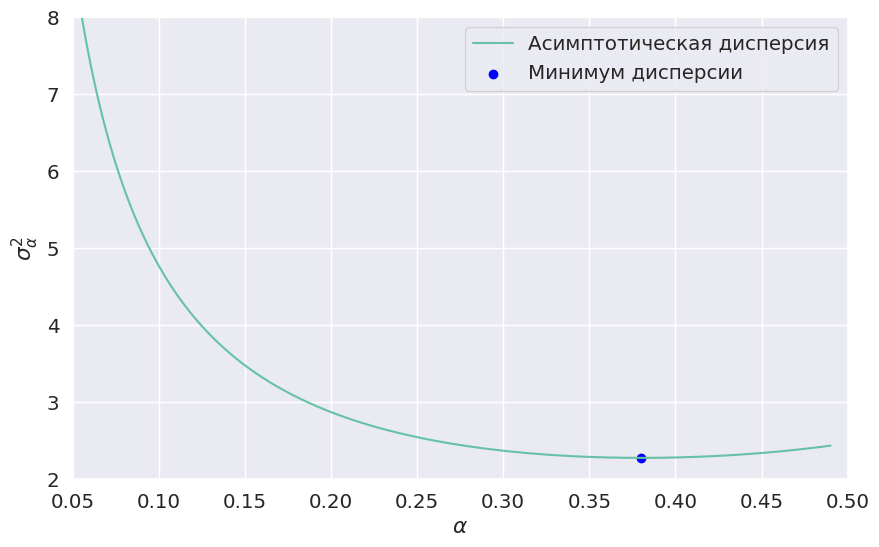

In [ ]:
def asymptotic_variance(alpha):
    """
    Функция для вычисления асимптотической дисперсии усеченного среднего для распределения Коши.
    Аргументы:
    alpha (float или массив): Параметр уровня усечения.
    Возвращает:
    float или массив: Значения асимптотической дисперсии для соответствующих значений alpha.
    """
    k = 2 / ((1 - 2 * alpha)**2)
    b = alpha * (np.tan(np.pi * (0.5 - alpha))**2)
    c = 1 / np.pi * (np.tan(np.pi * (0.5 - alpha)) - np.pi * (0.5 - alpha))
    return k * (b + c)

def find_minimum_variance(alpha_values, variance_values):
    """
    Функция для поиска минимальной дисперсии и соответствующего параметра уровня усечения.
    Аргументы:
    alpha_values (массив): Значения параметра уровня усечения.
    variance_values (массив): Значения асимптотической дисперсии.
    Возвращает:
    float, float: Параметр уровня усечения и соответствующая минимальная дисперсия.
    """
    min_variance_index = np.argmin(variance_values)
    min_variance_alpha = alpha_values[min_variance_index]
    min_variance = variance_values[min_variance_index]
    return min_variance_alpha, min_variance

alpha_values = np.linspace(0, 0.49, 1000)
variance_values = asymptotic_variance(alpha_values)
min_variance_alpha, min_variance = find_minimum_variance(alpha_values, variance_values)

plt.figure(figsize = (10, 6))
plt.plot(alpha_values, variance_values, label = 'Асимптотическая дисперсия')
plt.scatter(min_variance_alpha, min_variance, color = 'b', label = 'Минимум дисперсии')
plt.xlim(0.05, 0.5)
plt.ylim(2, 8)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma^2_{\alpha}$')
plt.legend()

print('Минимальная дисперсия: ', round(min_variance, 2))
print('Параметр минимальной дисперсии: ', round(min_variance_alpha, 2))

plt.show()

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ:**

При $\alpha = 0.38$ дисперсия минимальна и равна 2.28

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям.

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:**

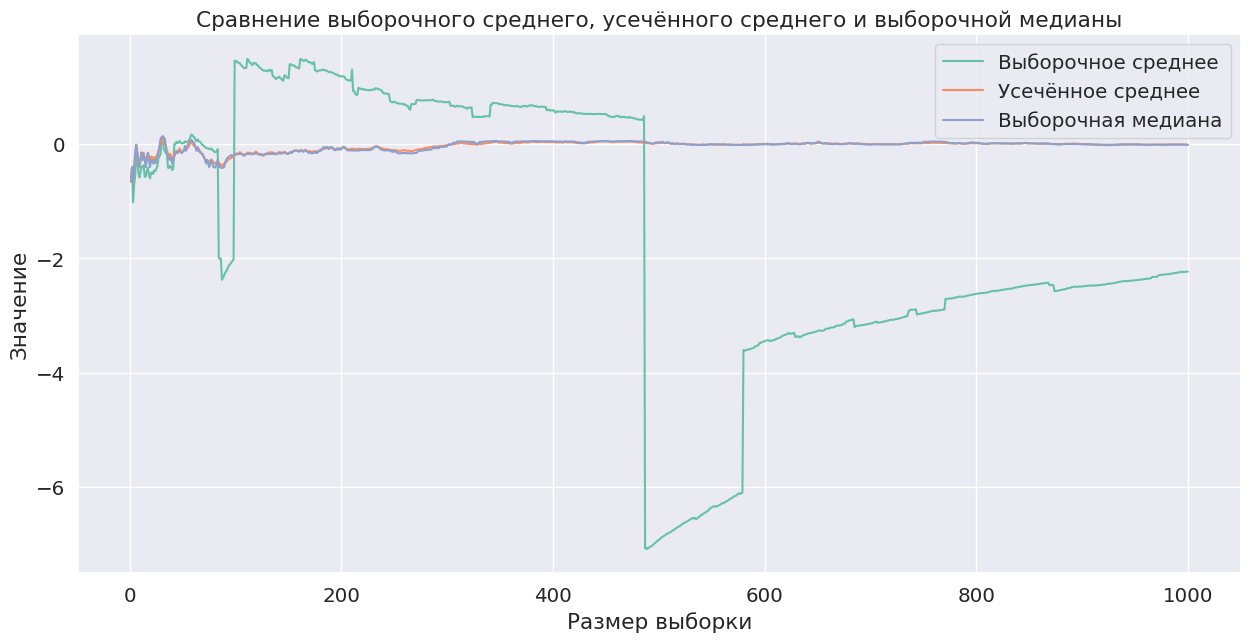

In [ ]:
size = 1000
X_cauchy = sps.cauchy().rvs(size)
alpha = 0.38

sample_indices = np.arange(size) + 1
cumulative_sum = np.cumsum(X_cauchy)
sample_sizes = np.expand_dims(sample_indices, axis = 1)

mean = cumulative_sum / sample_indices
trim_mean = np.array([sps.trim_mean(X_cauchy[:i+1], alpha) for i in range(size)])
median = np.array([np.median(X_cauchy[:i+1]) for i in range(size)])

plt.figure(figsize = (15, 7))
plt.plot(sample_indices, mean, label = 'Выборочное среднее')
plt.plot(sample_indices, trim_mean, label = 'Усечённое среднее')
plt.plot(sample_indices, median, label = 'Выборочная медиана')

plt.xlabel('Размер выборки')
plt.ylabel('Значение')
plt.title('Сравнение выборочного среднего, усечённого среднего и выборочной медианы')

plt.legend()
plt.grid(True)
plt.show()

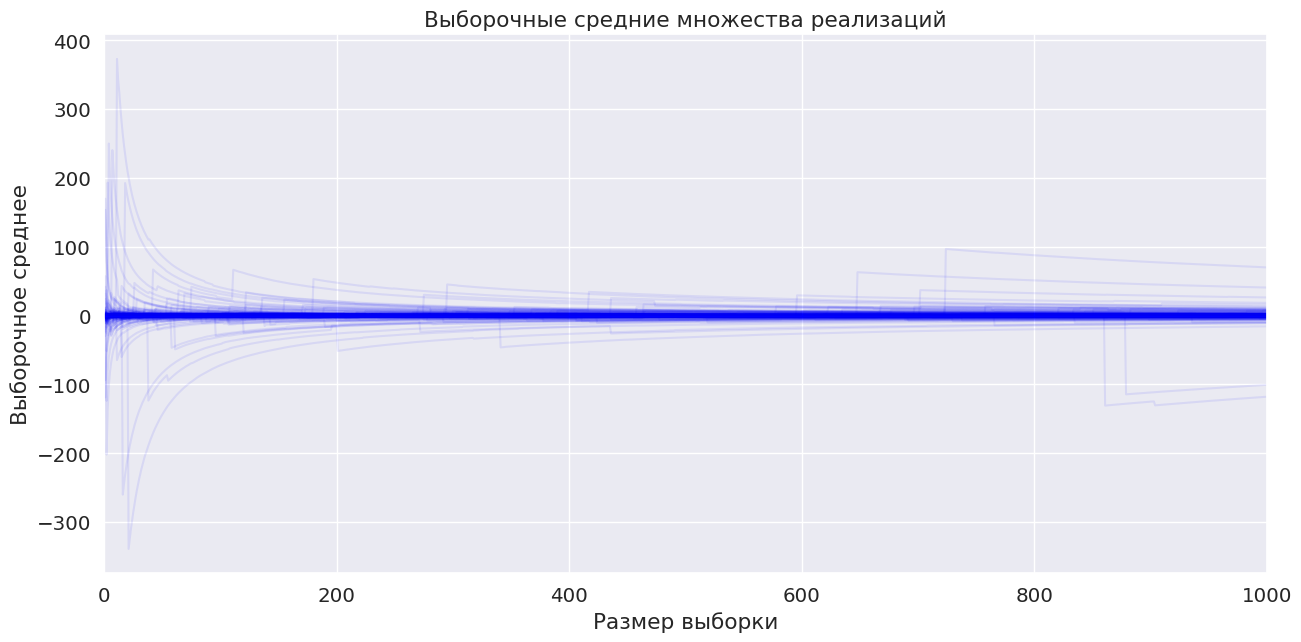

In [ ]:
sizes = (300, 1000)
X_cauchy = sps.cauchy().rvs(size = sizes)
alpha = 0.38

sample_indices = np.arange(sizes[-1]) + 1
cumulative_sum = np.cumsum(X_cauchy, axis = 1)

means = cumulative_sum / (np.expand_dims(sample_indices, axis = 0))
trim_means = np.array([sps.trim_mean(X[:, :i+1], alpha, axis = 1) for i in range(sizes[-1])])
medians = np.array([np.median(X_cauchy[:, :i+1], axis = 1) for i in range(sizes[-1])])

plt.figure(figsize = (15, 7))
plt.plot(sample_indices, means.T, color='b', alpha = 0.08)

plt.title('Выборочные средние множества реализаций')
plt.xlabel('Размер выборки')
plt.ylabel('Выборочное среднее')

plt.xlim(0, sizes[-1])
plt.show()

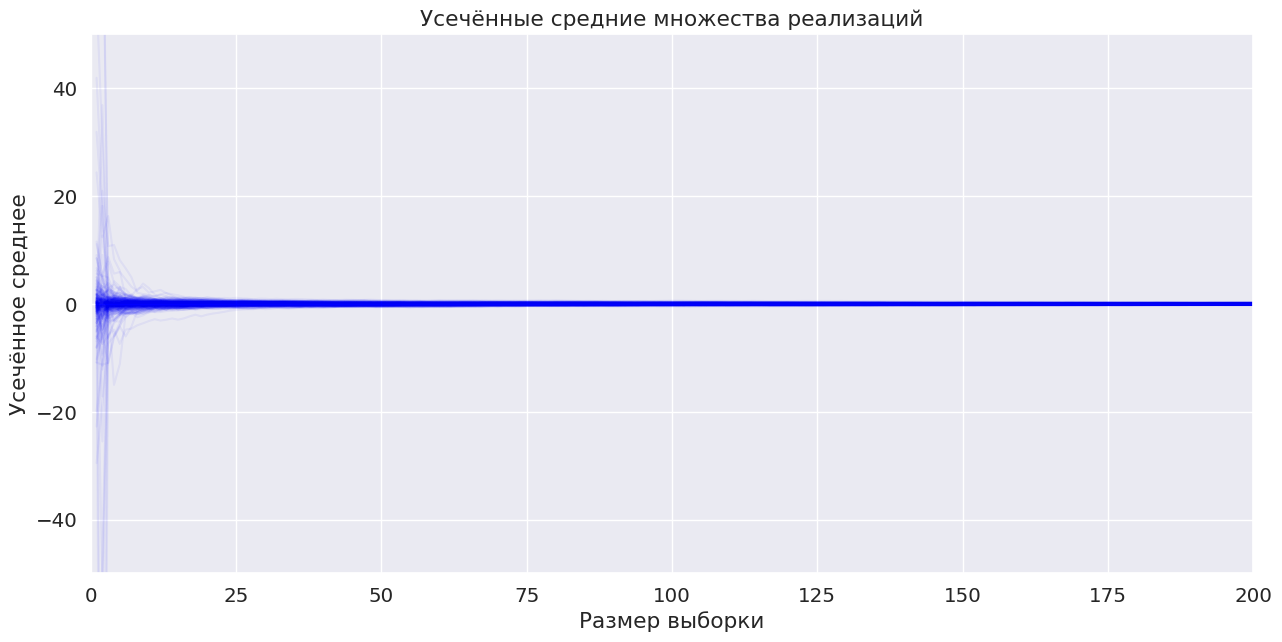

In [ ]:
sample_indices = np.arange(sizes[-1]) + 1
trim_means = np.array([sps.trim_mean(X_cauchy[:, :i+1], alpha, axis = 1) for i in range(sizes[-1])])

plt.figure(figsize = (15, 7))
plt.plot(sample_indices, trim_means, color='b', alpha = 0.05)

plt.title('Усечённые средние множества реализаций')
plt.xlabel('Размер выборки')
plt.ylabel('Усечённое среднее')

plt.ylim(-50, 50)
plt.xlim(0, 200)
plt.show()

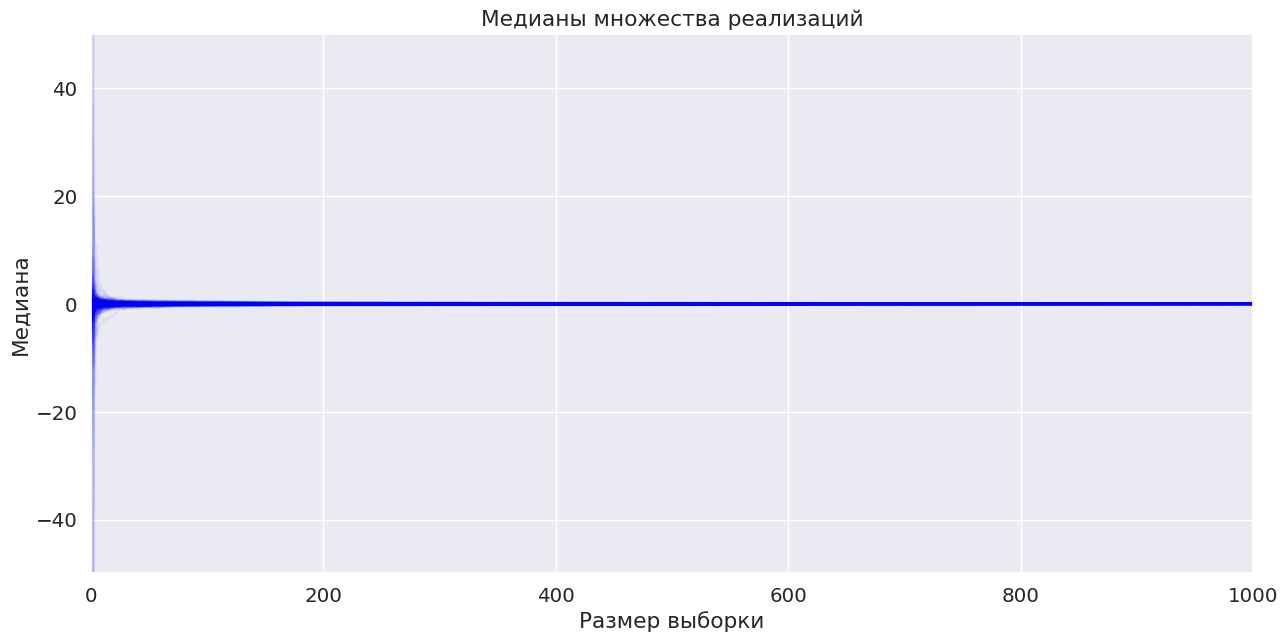

In [ ]:
sample_indices = np.arange(sizes[-1]) + 1
medians = np.array([np.median(X_cauchy[:, :i+1], axis = 1) for i in range(sizes[-1])])

plt.figure(figsize = (15, 7))
plt.plot(sample_indices, medians, color = 'b', alpha = 0.05)

plt.title('Медианы множества реализаций')
plt.xlabel('Размер выборки')
plt.ylabel('Медиана')

plt.ylim(-50, 50)
plt.xlim(0, sizes[-1])
plt.show()

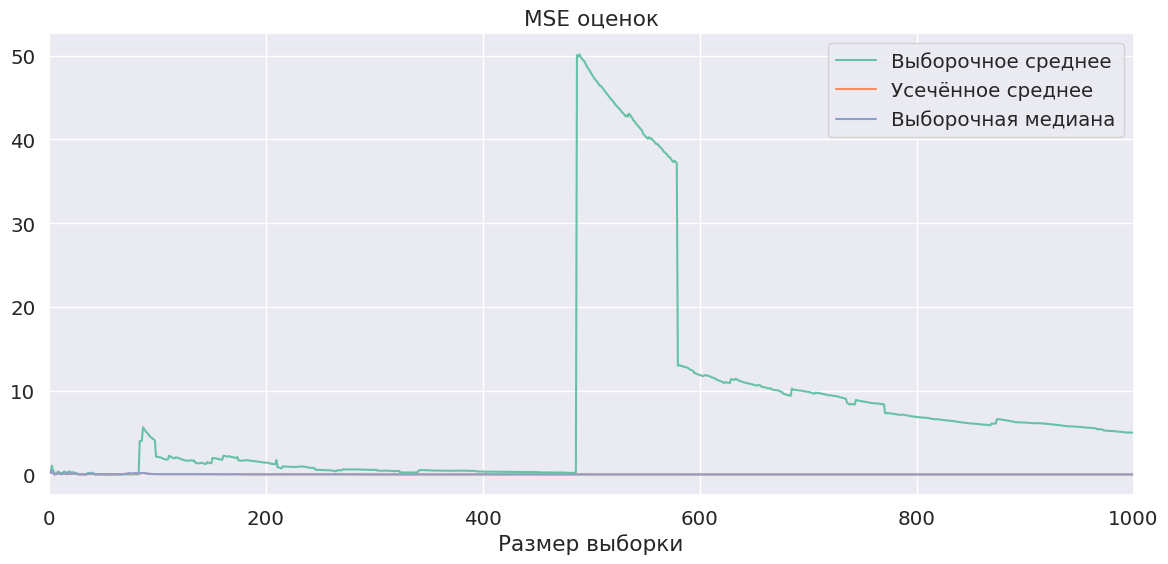

In [ ]:
def mse(estimation, theta = 0):
    return np.square(estimation - theta)

mse_m = mse(mean)
mse_tm = mse(trim_mean)
mse_med = mse(median)

ns = np.arange(size) + 1

plt.figure(figsize=(14, 6))

plt.plot(ns, mse_m,   label = 'Выборочное среднее')
plt.plot(ns, mse_tm,  label = 'Усечённое среднее' )
plt.plot(ns, mse_med, label = 'Выборочная медиана')

plt.xlim(0, size)

plt.title('MSE оценок')
plt.xlabel('Размер выборки')

plt.legend()
plt.show()

**Вывод:**

Из-за отсутствия определенного математического ожидания у распределения Коши выборочное среднее является неустойчивым и чувствительным к выбросам при любом размере выборки. Однако медиана и усеченное среднее быстро приближаются к целевому значению, несмотря на наличие выбросов, что делает их более надежными оценками центральной тенденции.

## Задача 6
Асимпотические доверительные интервалы ничего не могут гарантировать на малых размерах выборки.
В этой задаче вам предстоит иллюстрировать этот факт, посчитав реальный уровень доверия для интервалов.

**Реальный уровень доверия (оценка доли покрытия интервалом)**  - доля случаев попадания истинного значения параметра в доверительный интервал.

*Пример:* вы проводите 100 экспериментов (создаете 100 выборок), для каждой выборки рассчитываете АДИ для параметра $\theta$. Истинный параметр попадает в 93 интервала из 100, значит реальный уровень доверия в этом случае будет 0.93.

**Важно:** при такой оценке реального уровня доверия вы используете метод Монте-Карло. Погрешность этого метода составляет $\sim \frac{1}{\sqrt{n}}$, где $n$ - количество выборок, по которым осуществляется оценка.

*Вопрос:* какое $n$ нужно брать, если вы хотите оценить реальный уровень доверия с точностью до 2 знаков ($\delta = 0.01$)?

**Ответ:** $n \geq 10 000$


Сгенерируйте набор выборок из нормального распределения $\mathcal{N}(\theta, 1)$ при $\theta=0$

In [ ]:
theta = 0  # истинное значение параметра
sample_size = 300
sample_count = 10000
X = sps.norm.rvs(loc = theta, scale = 1, size = (sample_count, sample_size))

Рассмотрим $\hat{\theta} = \overline{X}$.

Напоминание из теории:
$$\hat{\theta} - \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}} < \theta < \hat{\theta} + \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}}$$

Посчитайте $z$ (используйте функцию `.ppf`)

In [ ]:
alpha = 0.95
z = sps.norm.ppf(1 - (1 -alpha)/2)
print(z)

1.959963984540054


Постройте график зависимости реального уровня доверия от размера выборки.

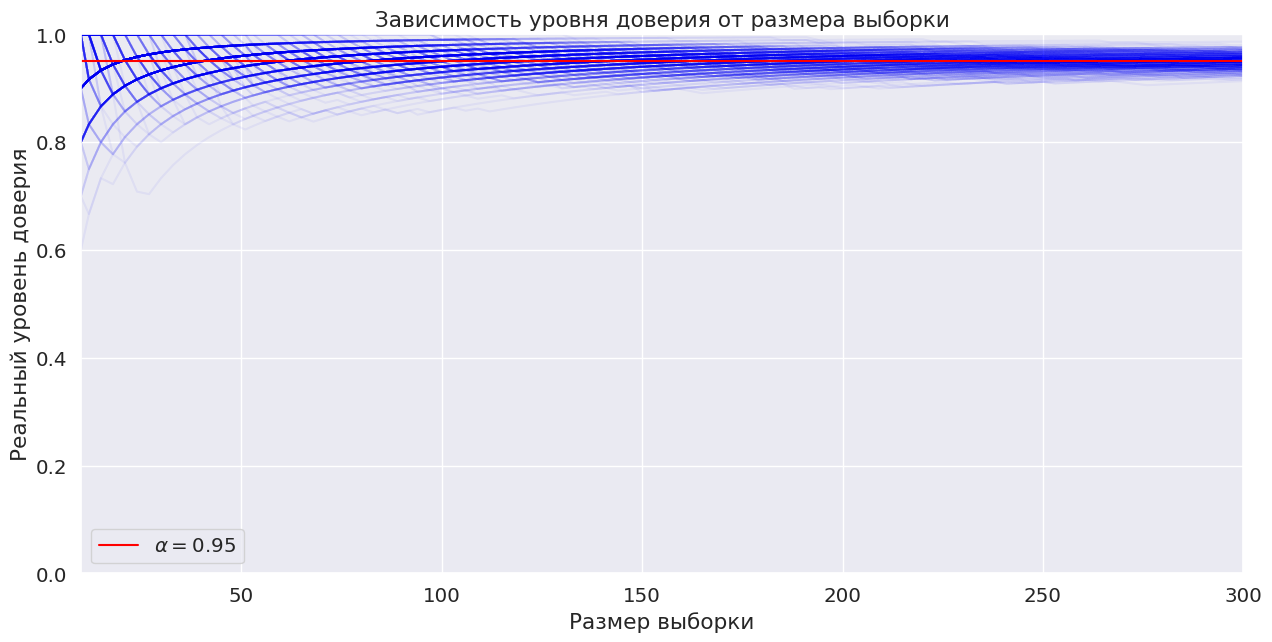

In [ ]:
def adi(X, z, sigma = 1, theta = 0):
    """
    Функция для оценки реального уровня доверия.
    Параметры:
        X : Массив выборок размера (sample_count, sample_size).
        z : Значение z для построения доверительного интервала.
        sigma : Стандартное отклонение распределения.
        theta : Истинное значение параметра.
    Возвращает:
        float: Реальный уровень доверия.
    """
    mean = np.mean(X, axis = 1)

    n = X.shape[1]
    mn = mean - z * sigma / np.sqrt(n)
    mx = mean + z * sigma / np.sqrt(n)

    res = np.array([1 if mn[i] < theta < mx[i] else 0 for i in range(len(X))])

    return res.sum() / len(res)

plt.figure(figsize = (15, 7))

n_grid = np.linspace(10, sample_size, 100).astype('int64')

for i in range(400):
    X = sps.norm.rvs(loc = theta, scale = 1, size = (sample_count, sample_size))
    results = [adi(X[:][:n], z) for n in n_grid]
    plt.plot(n_grid, results, color='b', alpha = 0.05)

plt.plot((10, sample_size), (alpha, alpha), color = 'r', label = fr'$\alpha = {alpha}$')
plt.xlim(10, sample_size)
plt.ylim(0, 1)

plt.title('Зависимость уровня доверия от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Реальный уровень доверия')

plt.grid(True)
plt.legend()
plt.show()

Сделайте выводы.

**Вывод:**

При небольших значениях размера выборки реальный уровень доверия может значительно отличаться от ожидаемого, как в сторону завышения, так и в сторону занижения. Однако, при увеличении размера выборки примерно до 300, большинство траекторий сходятся к постоянному значению. Для большинства случаев реальный уровень доверия остается в пределах примерно ±0.3 от ожидаемого значения.